In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime,date,time,timedelta
from matplotlib.ticker import PercentFormatter

i703 = pd.read_excel('703IWCMen.xlsx')
%matplotlib inline

In [3]:
i703.head()

,BIB,Name,Country,Gender,Division,Swim,Bike,Run,Overall,Division Rank,Gender Rank,Overall Rank,T1,T2
0,3,"Frodeno, Jan",DEU,Male,MPRO,00:21:54,02:04:29,01:06:34,03:36:31,1,1,1,00:01:42.800000,00:01:52.700000
1,26,"Brownlee, Alistair",GBR,Male,MPRO,00:21:58,02:04:30,01:07:40,03:37:42,2,2,2,00:01:40.400000,00:01:55
2,1,"Gomez noya, Javier",ESP,Male,MPRO,00:21:57,02:04:37,01:08:16,03:38:27,3,3,3,00:01:39.300000,00:01:59.200000
3,7,"Kanute, Ben",USA,Male,MPRO,00:21:53,02:04:37,01:12:38,03:42:44,4,4,4,00:01:41,00:01:55.500000
4,16,"Heemeryck, Pieter",BEL,Male,MPRO,00:22:23,02:04:16,01:13:00,03:43:06,5,5,5,00:01:38.400000,00:01:49.400000


In [4]:
transition=i703.loc[1,'T1']
print (transition)

00:01:40.400000


In [5]:
transition.hour

0

In [6]:
i703.dropna(inplace=True)

In [7]:
def convert_timed(time):
    delta=timedelta(hours=time.hour,minutes=time.minute,seconds=time.second,microseconds=time.microsecond)
    return delta

In [8]:
i703['T1']=i703['T1'].apply(convert_timed)
i703['T2']=i703['T2'].apply(convert_timed)
i703['Swim']=i703['Swim'].apply(convert_timed)
i703['Bike']=i703['Bike'].apply(convert_timed)
i703['Run']=i703['Run'].apply(convert_timed)
i703['Overall']=i703['Overall'].apply(convert_timed)

In [9]:
i703['T1m']=i703['T1'].astype('timedelta64[s]')/60
i703['T2m']=i703['T2'].astype('timedelta64[s]')/60
i703['Swimm']=i703['Swim'].astype('timedelta64[s]')/60
i703['Bikem']=i703['Bike'].astype('timedelta64[s]')/60
i703['Runm']=i703['Run'].astype('timedelta64[s]')/60
i703['Overallm']=i703['Overall'].astype('timedelta64[s]')/60

In [10]:
i703['T1m']

0        1.700000
1        1.666667
2        1.650000
3        1.683333
4        1.633333
5        1.733333
6        1.716667
7        1.850000
8        2.550000
9        1.850000
10       1.850000
11       1.833333
12       1.883333
13       1.966667
14       1.800000
15       1.816667
16       1.783333
17       1.850000
18       2.066667
19       1.983333
20       2.166667
21       2.766667
22       1.700000
23       2.866667
24       2.733333
25       1.950000
26       1.933333
27       2.633333
28       2.833333
29       3.100000
          ...    
2301     7.250000
2302     4.950000
2303     7.833333
2304     6.350000
2305     5.333333
2306     6.800000
2307     6.166667
2308     5.883333
2309     5.550000
2310     9.300000
2311     7.916667
2312     6.383333
2313     8.033333
2314     9.633333
2315     7.200000
2316     9.050000
2317     8.883333
2318     8.066667
2319    10.283333
2320     6.783333
2321     5.733333
2322    10.433333
2323     9.466667
2324     6.033333
2325     7

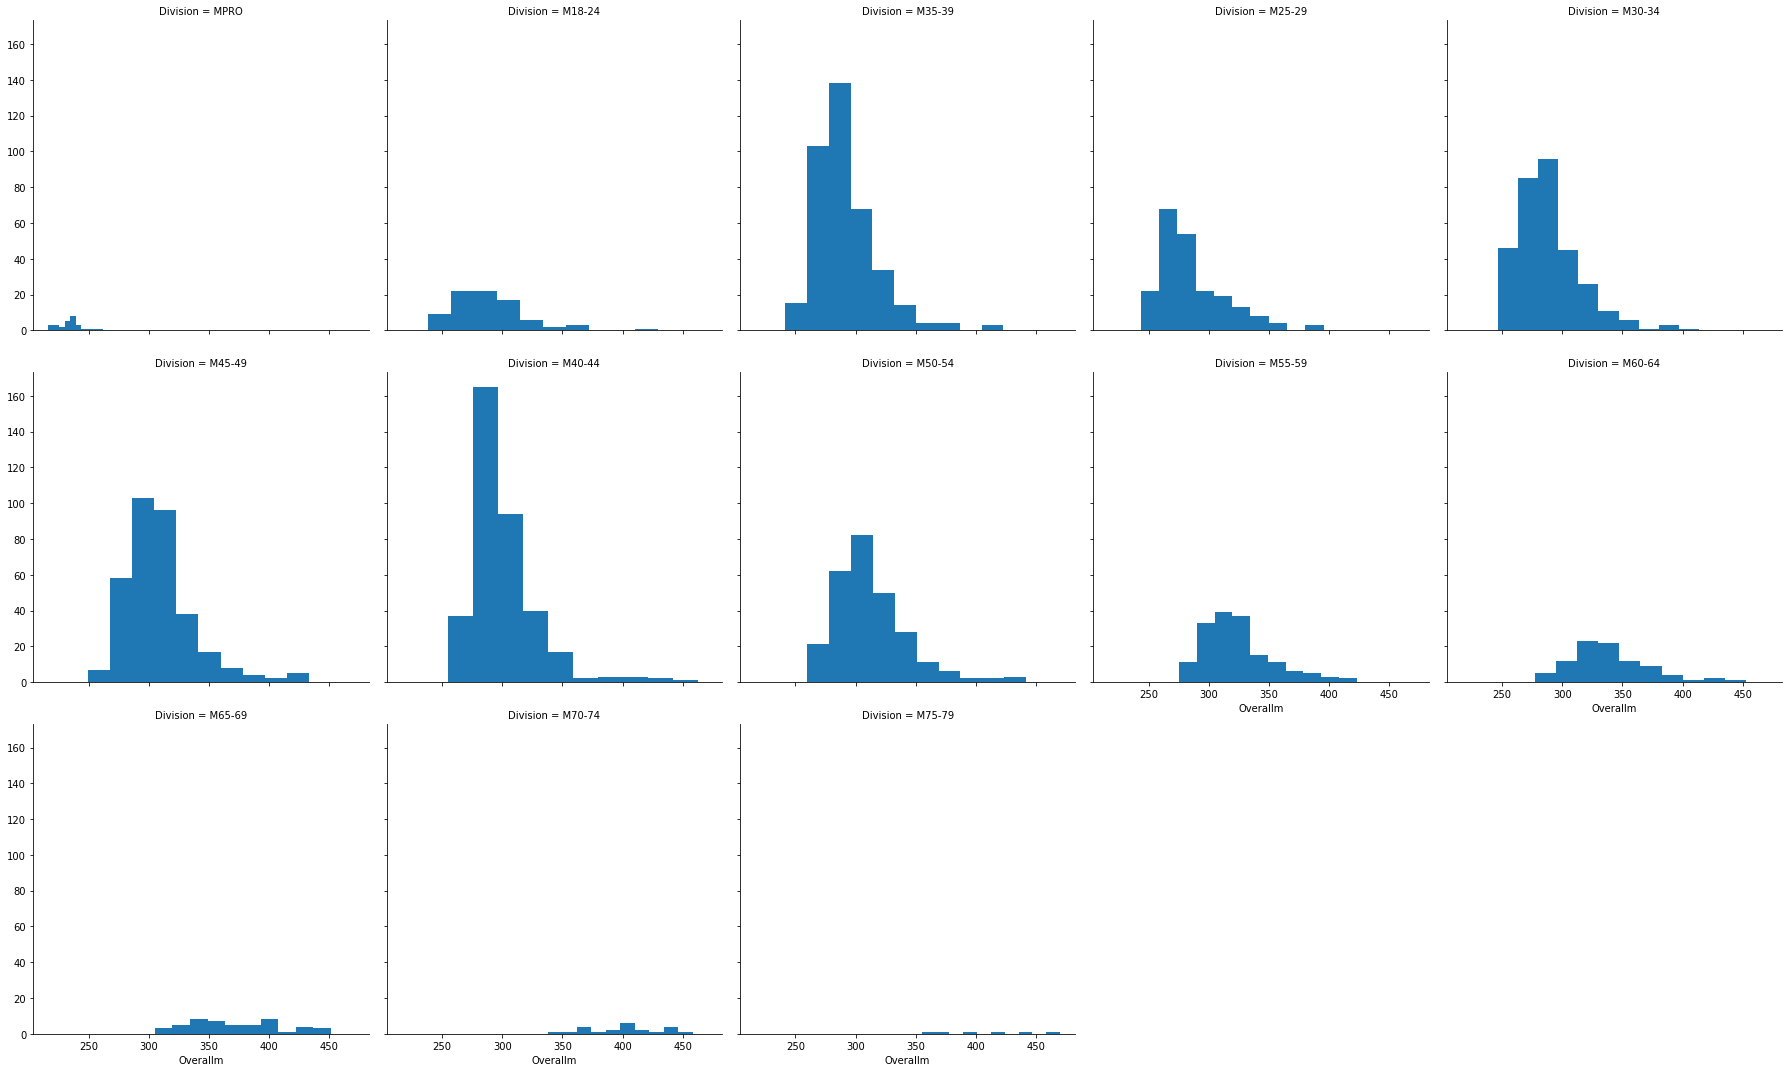

In [11]:

g = sns.FacetGrid(i703, col="Division",col_wrap=5,height=5)
g.map(plt.hist,"Overallm");

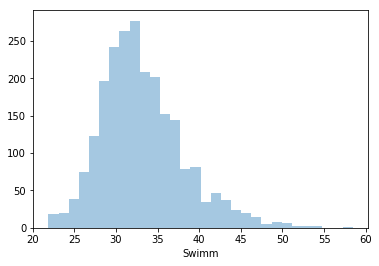

In [12]:


sns.distplot(i703['Swimm'],kde=False,bins=30)

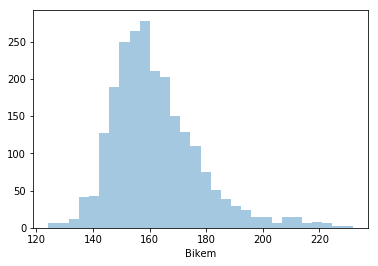

In [14]:

sns.distplot(i703['Bikem'],kde=False,bins=30)

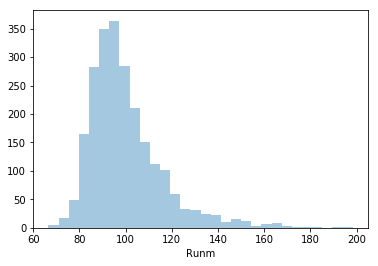

In [22]:

sns.distplot(i703['Runm'],kde=False,bins=30)

In [10]:
dfnew = i703[['Division','Swimm','T1m','Bikem','T2m','Runm']]

In [11]:
ga_averages =dfnew.groupby('Division').mean()

In [12]:
ga_averages

,Swimm,T1m,Bikem,T2m,Runm
Division,,,,,
M18-24,30.554268,3.538211,156.689228,3.222358,94.362398
M25-29,31.215806,3.616901,155.065962,3.114554,92.778091
M30-34,31.529063,3.694271,156.606198,3.311042,93.417500
M35-39,31.784508,3.878024,157.302611,3.403873,95.236162
M40-44,33.178114,4.102015,161.064377,3.670055,98.078984
M45-49,33.815187,4.223964,164.771302,3.838856,102.387278
M50-54,34.211111,4.419039,165.681710,3.910549,104.229775
M55-59,36.371914,4.648354,169.936831,4.291872,109.212243
M60-64,37.361722,4.917766,177.810256,4.758425,114.465018


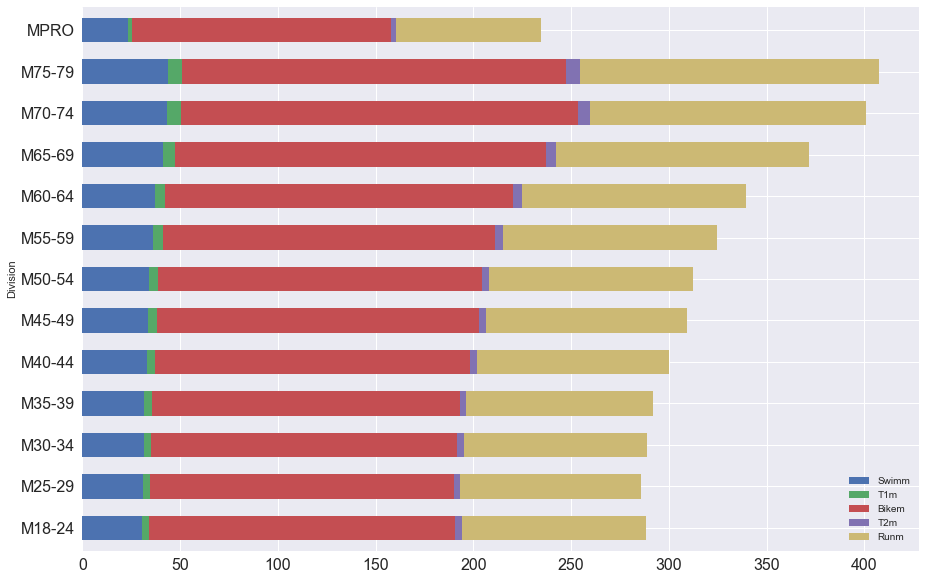

In [13]:
plt.style.use('seaborn')
ga_averages.plot.barh(stacked=True,fontsize=16,width=0.6,figsize=(15,10))

/Users/alejandrocoy/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


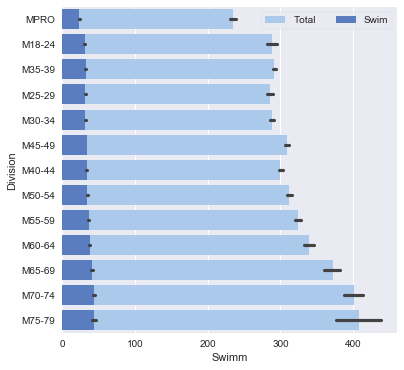

In [14]:
f,ax=plt.subplots(figsize=(6,6))
sns.set_color_codes('pastel')
sns.barplot(x='Overallm',y='Division',data=i703,label="Total",color='b')
sns.set_color_codes('muted')
sns.barplot(x='Swimm',y='Division',data=i703,label="Swim",color='b')
##sns.barplot(x='Runm',y='Division',data=i703,label="Run",color='r')
##sns.barplot(x='Bikem',y='Division',data=i703,label="Bike",color='g')
ax.legend(ncol=2,frameon=True)

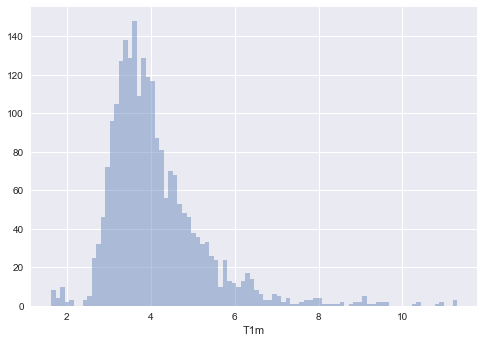

In [17]:
sns.distplot(i703['T1m'],bins=90,kde=False)

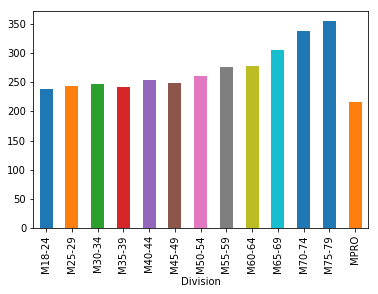

In [72]:
i703['Overallm'].groupby(i703['Division']).min().plot(kind='bar')

Text(0.5,1,'Run Time')

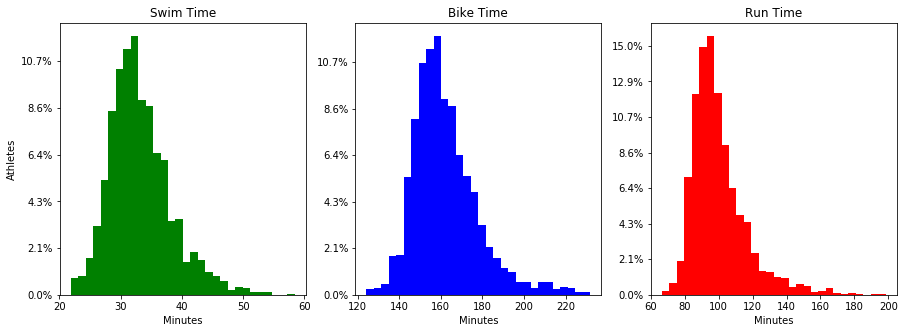

In [70]:
num_bins = 30

fig, ax = plt.subplots(1,3,sharey=False,figsize=(15,5))

# the histogram of the data
n, bins, patches = ax[0].hist(i703['Swimm'], num_bins,color="g")
n, bins, patches = ax[1].hist(i703['Bikem'], num_bins,color="b")
n, bins, patches = ax[2].hist(i703['Runm'], num_bins,color="r")
ax[0].yaxis.set_major_formatter(PercentFormatter(xmax=2326))
ax[1].yaxis.set_major_formatter(PercentFormatter(xmax=2326))
ax[2].yaxis.set_major_formatter(PercentFormatter(xmax=2326))

ax[0].set_xlabel('Minutes')
ax[0].set_ylabel('Athletes')
ax[0].set_title('Swim Time')

ax[1].set_xlabel('Minutes')
ax[1].set_title('Bike Time')

ax[2].set_xlabel('Minutes')
ax[2].set_title('Run Time')